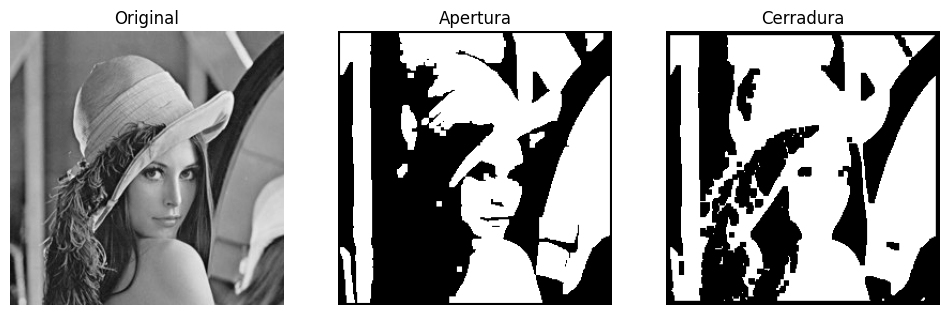

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga la imagen
ruta_imagen = "C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/lenna.jpg"
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Binariza la imagen
_, imagenBinarizada = cv2.threshold(imagen, 120, 255, cv2.THRESH_BINARY)

def dilatacion_manual(imagen, kernel):
    altura, ancho = imagen.shape
    kh, kw = kernel.shape

    # Calcula el padding necesario para que el kernel se ajuste completamente a la imagen
    ph = kh // 2
    pw = kw // 2

    # Crea una imagen resultado con el mismo tamaño que la original
    resultado = np.zeros_like(imagen)

    # Aplica la dilatación
    for y in range(ph, altura - ph):
        for x in range(pw, ancho - pw):
            # Extrae la región vecina definida por el tamaño del kernel
            vecindario = imagen[y-ph:y+ph+1, x-pw:x+pw+1]

            # Realiza la operación de dilatación multiplicando el vecindario por el kernel
            resultado[y, x] = np.max(vecindario * kernel)

    return resultado

def erosion_manual(imagen, kernel):
    altura, ancho = imagen.shape
    kh, kw = kernel.shape

    # Calcula el padding necesario para que el kernel se ajuste completamente a la imagen
    ph = kh // 2
    pw = kw // 2

    # Crea una imagen resultado con el mismo tamaño que la original
    resultado = np.zeros_like(imagen)

    # Aplica la erosión
    for y in range(ph, altura - ph):
        for x in range(pw, ancho - pw):
            # Extrae la región vecina definida por el tamaño del kernel
            vecindario = imagen[y-ph:y+ph+1, x-pw:x+pw+1]
            erosion = np.min(vecindario[kernel == 1])
            resultado[y, x] = erosion

    return resultado

def apertura(imagen, kernel):
    # Aplica erosión seguida de dilatación
    erosionada = erosion_manual(imagen, kernel)
    apertura_resultado = dilatacion_manual(erosionada, kernel)
    return apertura_resultado

def cerradura(imagen, kernel):
    # Aplica dilatación seguida de erosión
    dilatada = dilatacion_manual(imagen, kernel)
    cerradura_resultado = erosion_manual(dilatada, kernel)
    return cerradura_resultado

# Define el kernel en forma de cruz
kernel = np.ones((5, 5), np.uint8)

# Aplica la función de apertura
apertura_resultado = apertura(imagenBinarizada, kernel)

# Aplica la función de cerradura
cerradura_resultado = cerradura(imagenBinarizada, kernel)


# --- Resultados --- #
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(apertura_resultado, cmap='gray')
plt.title("Apertura")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cerradura_resultado, cmap='gray')
plt.title("Cerradura")
plt.axis('off')

plt.show()